In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Import preprocessing libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score, classification_report

In [ ]:
df = pd.read_csv('framingham.csv')
df.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,male,39,4.0,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,female,46,2.0,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,0
2,2,male,48,1.0,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,0
3,3,female,61,3.0,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,1
4,4,female,46,3.0,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,0


EXPLORATORY DATA ANALYSIS

In [ ]:
#GIVES AN OVERVIEW OF THE FEATURES AND THEIR DATATYPES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4238 non-null   int64  
 1   sex              4238 non-null   object 
 2   age              4238 non-null   int64  
 3   education        4133 non-null   float64
 4   currentSmoker    4238 non-null   object 
 5   cigsPerDay       4209 non-null   float64
 6   BPMeds           4185 non-null   object 
 7   prevalentStroke  4238 non-null   object 
 8   prevalentHyp     4238 non-null   object 
 9   diabetes         4238 non-null   object 
 10  totChol          4188 non-null   float64
 11  sysBP            4238 non-null   float64
 12  diaBP            4238 non-null   float64
 13  BMI              4219 non-null   float64
 14  heartRate        4237 non-null   float64
 15  glucose          3850 non-null   float64
 16  TenYearCHD       4238 non-null   int64  
dtypes: float64(8),

In [ ]:
#CALCULATES THE NUMBER OF MISSING VALUES IN EACH COLUMN
df.isna().sum()

Unnamed: 0           0
sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
#DESCRIBES THE DATASET, INCLUDING THE MAX, MEAN, MIN OF EACH COLUMN
df.describe(include='all')

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238,4238.000000,4133.000000,4238,4209.000000,4185,4238,4238,4238,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
unique,NaN,2,NaN,NaN,2,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,female,NaN,NaN,No,NaN,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2419,NaN,NaN,2144,NaN,4061,4213,2922,4129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2118.500000,NaN,49.584946,1.978950,NaN,9.003089,NaN,NaN,NaN,NaN,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,1223.549549,NaN,8.572160,1.019791,NaN,11.920094,NaN,NaN,NaN,NaN,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,NaN,32.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,1059.250000,NaN,42.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,2118.500000,NaN,49.000000,2.000000,NaN,0.000000,NaN,NaN,NaN,NaN,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,3177.750000,NaN,56.000000,3.000000,NaN,20.000000,NaN,NaN,NaN,NaN,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000


In [ ]:
#REPLACING MISSING VALUES/ DROPPING MISSING VALUES
df.heartRate.dropna()
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)
df['totChol'].fillna(df['totChol'].mean(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)

In [ ]:
#FINDING THE DATATYPES OF THE FEATURES
df.dtypes

Unnamed: 0           int64
sex                 object
age                  int64
education          float64
currentSmoker       object
cigsPerDay         float64
BPMeds              object
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

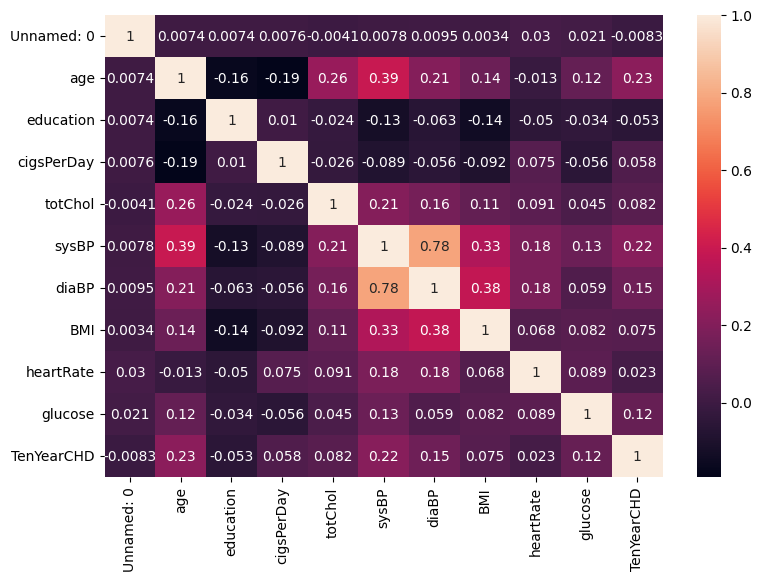

In [ ]:
#DETERMING CORRELATION BETWEEN NUMERICAL FEATURES.
numerical_df = df.select_dtypes(include=['float', 'int'])
corr = numerical_df.corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
#THIS COLUMN IS THE INDEX OF THE ROW, HENCE NOT AN IMPORTANT FEATURE
df.drop(labels=['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
#SEPARATING THE NUMERICAL FEATURES FROM THE CATEGORICAL FEATURES
input_feats = df.drop(labels=['TenYearCHD'], axis=1)
cat_cols_input = input_feats.select_dtypes(include='object').columns.tolist()
num_cols_input = input_feats.select_dtypes(include=np.number).columns.tolist()

In [ ]:
#SPLITTING THE DATASET
df_full_train, df_test = train_test_split(df, test_size= 0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)


In [ ]:
#ASSIGNING THE OUTPUT VARIABLES
y_train = df_train.TenYearCHD.values
y_test = df_test.TenYearCHD.values
y_val = df_val.TenYearCHD.values

In [ ]:
#DELETING THE TARGET FEATURE FROM THE TRAIN, VALIDATION AND TEST DATASET
del df_train['TenYearCHD']
del df_test['TenYearCHD']
del df_val['TenYearCHD']

In [ ]:
#ENCODING THE CATEGORICAL FEATURES, DICTVECTORIZER WAS USED, YOU CAN ALSO USE ONEHOTENCODING
train_dicts = df_train.fillna(0).to_dict(orient = 'records') #THIS CONVERTS THE INPUT FEATURES TO A DICTIONARY

In [ ]:
#THE DICTIONARY IS THEN CONVERTED TO A MATRIX FOR MATHEMATICAL COMPUTATIONS AND MODEL SELECTED
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
model =LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#USING MODEL TO PREDICT THE LIKELIHOOD OF HEART DISEASE
model.predict_proba(X_train)

array([[0.90997708, 0.09002292],
       [0.34986685, 0.65013315],
       [0.93249825, 0.06750175],
       ...,
       [0.95149149, 0.04850851],
       [0.88848041, 0.11151959],
       [0.80012485, 0.19987515]])

In [ ]:
#FINDING THE ACCURACY OF THE MODEL ON THE TRAIN DATASET
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_accuracy

0.8544453186467349

In [ ]:
#FINDING THE ROC_AUC SCORE OF THE MODEL ON THE TRAIN DATASET
roc_auc_score(y_train, train_pred)

0.5315947709236086

In [ ]:
#MODEL IS TESTED WITH THE VALIDATION DATASET
val_dicts = df_val.fillna(0).to_dict(orient = 'records')
X_val = dv.transform(val_dicts)
model.predict_proba(X_val)

array([[0.7742284 , 0.2257716 ],
       [0.94233858, 0.05766142],
       [0.66914674, 0.33085326],
       ...,
       [0.63612731, 0.36387269],
       [0.93430061, 0.06569939],
       [0.94480269, 0.05519731]])

In [ ]:
#PERFORMANCE OF THE MODEL ON THE VALIDATION DATASET
val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
val_accuracy

0.8537735849056604

In [ ]:
val1_pred = model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, val1_pred)

0.7071289062500001

DECISION TREES

In [ ]:
#UTILIZING DECISION TREES, IF ITS GOING TO IMPROVE THE ACCURACY AND ROC_AUC_SCORE OF THE MODEL
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#SELECTING THE MODEL
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
dt.predict_proba(X_train)

array([[0.96354992, 0.03645008],
       [0.8173913 , 0.1826087 ],
       [0.8173913 , 0.1826087 ],
       ...,
       [0.96354992, 0.03645008],
       [0.89310345, 0.10689655],
       [0.8173913 , 0.1826087 ]])

In [ ]:
train_pred = dt.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_accuracy

0.8540519276160503

In [ ]:
val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
val_accuracy

0.8537735849056604

In [ ]:
val1_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, val1_pred)

0.67490234375

In [ ]:
# TESTING FOR SUITABLE MAX_DEPTH AND MIN_SAMPLES LEAF, SELECTING A SUITABLE VALUE GREATLY IMPROVES THE MODEL OUTPUT
for d in [1,2,3,4,5,6,7,8,9,10,12,15,20, None]:
  dt = DecisionTreeClassifier(max_depth= d)
  dt.fit(X_train, y_train)

  y_pred = dt.predict_proba(X_val)[:, 1]
  auc = roc_auc_score(y_val, y_pred)
  print('%4s -> %.3f' %(d, auc))

   1 -> 0.622
   2 -> 0.663
   3 -> 0.675
   4 -> 0.676
   5 -> 0.661
   6 -> 0.665
   7 -> 0.649
   8 -> 0.615
   9 -> 0.590
  10 -> 0.576
  12 -> 0.542
  15 -> 0.543
  20 -> 0.564
None -> 0.551


In [ ]:
#FROM TEST VALUES 3, 4, 2, 6 GAVE HIGHEST OUTPUT
scores = []
for d in [3, 4, 2, 6]:
  for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
    dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((d, s, auc))
scores

[(3, 1, 0.67490234375),
 (3, 2, 0.67490234375),
 (3, 5, 0.681325954861111),
 (3, 10, 0.6780436197916666),
 (3, 15, 0.6747233072916667),
 (3, 20, 0.6747233072916667),
 (3, 100, 0.6803059895833333),
 (3, 200, 0.687570529513889),
 (3, 500, 0.6773003472222222),
 (4, 1, 0.6763020833333334),
 (4, 2, 0.6763020833333334),
 (4, 5, 0.6989637586805555),
 (4, 10, 0.6876790364583334),
 (4, 15, 0.6796223958333334),
 (4, 20, 0.681564670138889),
 (4, 100, 0.6909830729166667),
 (4, 200, 0.6933539496527779),
 (4, 500, 0.6773003472222222),
 (2, 1, 0.6628797743055557),
 (2, 2, 0.6628797743055557),
 (2, 5, 0.6628797743055557),
 (2, 10, 0.6593315972222222),
 (2, 15, 0.6740451388888888),
 (2, 20, 0.6740451388888888),
 (2, 100, 0.6740451388888888),
 (2, 200, 0.6740451388888888),
 (2, 500, 0.6773003472222222),
 (6, 1, 0.6626030815972223),
 (6, 2, 0.6547471788194444),
 (6, 5, 0.682275390625),
 (6, 10, 0.658865017361111),
 (6, 15, 0.6797960069444444),
 (6, 20, 0.6831434461805556),
 (6, 100, 0.6868543836805556),


In [ ]:
#TRAINING MODEL WITH SUITABLE PARAMETER VALUES, ALSO THE ROC_AUC_SCORE FOR BOTH TRAIN AND VAL DATASET
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7239063488972199
val: 0.6989637586805555


In [ ]:
#ACCURACY OF MODEL ON TRAIN AND VAL DATASETS
train_pred = dt.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_accuracy

0.8587726199842644

In [ ]:
val_pred = dt.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
val_accuracy

0.8525943396226415

RANDOM FOREST

In [ ]:
#UTILIZING RANDOM FOREST TO IMPROVE THE PERFORMANCE OF THE MODEL.
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#DETERMING THE SUITABLE PARAMETER VALUES
ans = []
for d in [5, 10, 15]:
  for s in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=s, max_depth=d, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    ans.append((d, s, auc))
ans

[(5, 10, 0.7394422743055555),
 (5, 20, 0.7346788194444445),
 (5, 30, 0.7382649739583333),
 (5, 40, 0.7381293402777778),
 (5, 50, 0.739431423611111),
 (5, 60, 0.7386393229166667),
 (5, 70, 0.7380750868055556),
 (5, 80, 0.7392578125),
 (5, 90, 0.7388671874999999),
 (5, 100, 0.7389105902777778),
 (5, 110, 0.7391384548611111),
 (5, 120, 0.7388129340277778),
 (5, 130, 0.7378689236111111),
 (5, 140, 0.738064236111111),
 (5, 150, 0.7379340277777776),
 (5, 160, 0.7378472222222223),
 (5, 170, 0.7374891493055556),
 (5, 180, 0.7363389756944444),
 (5, 190, 0.7370442708333333),
 (5, 200, 0.7364800347222221),
 (10, 10, 0.6995496961805555),
 (10, 20, 0.7059787326388888),
 (10, 30, 0.7184136284722222),
 (10, 40, 0.7260633680555555),
 (10, 50, 0.7299913194444445),
 (10, 60, 0.7264431423611111),
 (10, 70, 0.7295789930555555),
 (10, 80, 0.7303168402777779),
 (10, 90, 0.7314453125000001),
 (10, 100, 0.7296006944444444),
 (10, 110, 0.72783203125),
 (10, 120, 0.7296332465277778),
 (10, 130, 0.72910156249999

In [ ]:
#TESTING FOR PARAMETER VALUES THAT GIVES MAXIMUM OUTPUT
ans = []
for a in [1, 3, 5, 10, 15]:
  for s in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=s, max_depth=5,min_samples_leaf= a, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    ans.append((a, s, auc))
ans

[(1, 10, 0.7394422743055555),
 (1, 20, 0.7346788194444445),
 (1, 30, 0.7382649739583333),
 (1, 40, 0.7381293402777778),
 (1, 50, 0.739431423611111),
 (1, 60, 0.7386393229166667),
 (1, 70, 0.7380750868055556),
 (1, 80, 0.7392578125),
 (1, 90, 0.7388671874999999),
 (1, 100, 0.7389105902777778),
 (1, 110, 0.7391384548611111),
 (1, 120, 0.7388129340277778),
 (1, 130, 0.7378689236111111),
 (1, 140, 0.738064236111111),
 (1, 150, 0.7379340277777776),
 (1, 160, 0.7378472222222223),
 (1, 170, 0.7374891493055556),
 (1, 180, 0.7363389756944444),
 (1, 190, 0.7370442708333333),
 (1, 200, 0.7364800347222221),
 (3, 10, 0.724072265625),
 (3, 20, 0.7205512152777778),
 (3, 30, 0.7296440972222222),
 (3, 40, 0.7339952256944445),
 (3, 50, 0.7353624131944445),
 (3, 60, 0.735590277777778),
 (3, 70, 0.7350802951388888),
 (3, 80, 0.7372395833333333),
 (3, 90, 0.7373046875),
 (3, 100, 0.7385199652777779),
 (3, 110, 0.738498263888889),
 (3, 120, 0.7384765625),
 (3, 130, 0.7383680555555556),
 (3, 140, 0.738085937

In [ ]:
min_samples_leaf= 10

In [ ]:
#TRAINING MODEL WITH SUITABLE PARAMETER VALUES
rf = RandomForestClassifier(n_estimators=110, max_depth = 5, min_samples_leaf=10, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.791764448123083
val: 0.7420030381944445


In [ ]:
train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_accuracy

0.8520849724626278

In [ ]:
val_pred = rf.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
val_accuracy

0.8490566037735849